In [4]:
import pandas as pd

# Filnamn och ämnen
file_path = "riket2023_åk9_np.xlsx"
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

# Läs in data, hoppa över de första 8 raderna
dfs = {subject: pd.read_excel(file_path, sheet_name=subject, skiprows=8) for subject in subjects}

# Justera kolumnnamn baserat på data
for subject, df in dfs.items():
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
                  "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

# Konvertera relevanta kolumner till numeriska värden
for subject, df in dfs.items():
    numeric_cols = ["Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
                    "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
                    "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]
    
    # Ta bort eventuella specialtecken och konvertera till float
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' gör om felaktiga värden till NaN

# Kontrollera att datan nu är numerisk
for subject, df in dfs.items():
    print(f"\n{subject} Data (Efter konvertering):")
    print(df.dtypes)  # Skriver ut datatyper för varje kolumn

# Kontrollera att datan laddats in korrekt
for subject, df in dfs.items():
    print(f"\n{subject} Data:")
    print(df.head())


Engelska Data (Efter konvertering):
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (poäng)    float64
Pojkar (poäng)     float64
dtype: object

Matematik Data (Efter konvertering):
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (poäng)    float64
Pojkar (poäng)     float64
dtype: object

Svenska Data (Efter konvertering):
Plats               object
Huvudman            object
Totalt (A-F)         int64
Flickor (A-F)        int64
Pojkar (A-F)         int64
Totalt (A-E)       float64
Flickor (A-E)      float64
Pojkar (A-E)       float64
Totalt (poäng)     float64
Flickor (poäng)    float

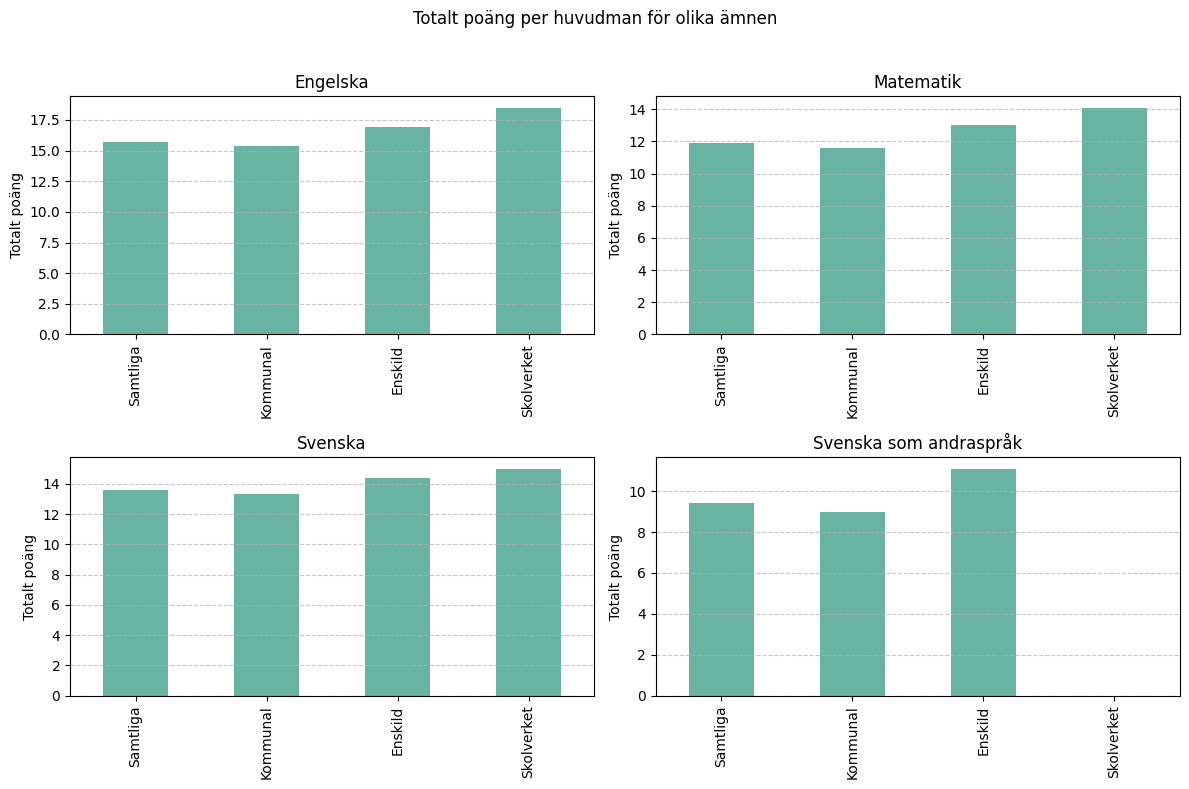

In [5]:
import matplotlib.pyplot as plt
import os

# Använd mapp "Visualiseringar"
output_dir = "Visualiseringar"

# Skapa en figur med subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Totalt poäng per huvudman för olika ämnen")

# Plotta stapeldiagram för varje ämne
for ax, (subject, df) in zip(axes.flatten(), dfs.items()):
    df.plot(x="Huvudman", y="Totalt (poäng)", kind="bar", ax=ax, legend=False, color="#69b3a2")
    ax.set_title(subject)
    ax.set_ylabel("Totalt poäng")
    ax.set_xlabel("")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Anpassa layout och spara figuren i "Visualiseringar"-mappen
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(output_dir, "totalt_poäng_huvudman.png"), dpi=300)
plt.show()
